# Medical Insurance Cost- Exploratory Data Analysis

**Goal:** To analyze the Medical Cost Personal Dataset (insurance.csv) to understand variable distributions, relationships with charges (medical cost billed), and prepare insights for modeling.

**Dataset source:** Kaggle — `"Medical Cost Personal Datasets"`.

**Tasks**
1. Load data & run initial checks (head, info, describe)

2. Clean and prepare the data (including label encoding for categorical columns)

3. Exploratory data analysis

    - Plot variable distributions

    - Compare features with charges

4. Correlation analysis (check relationships between features and charges) 



In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Missing values and duplication check: 

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.duplicated().sum()

np.int64(1)

In [10]:
df= df.drop_duplicates()

**Visualizing the distribution of categorical variables**

In [15]:
df.value_counts("sex")

sex
male      675
female    662
Name: count, dtype: int64

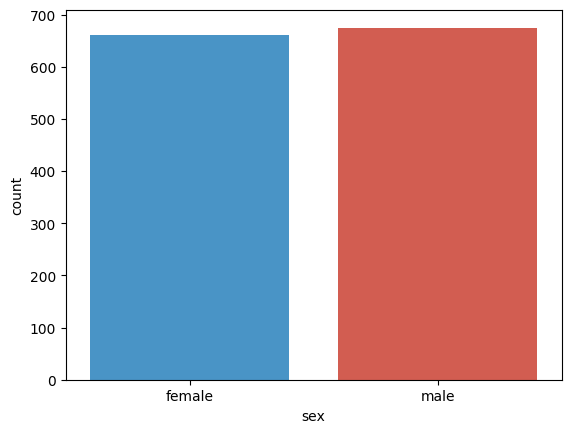

In [27]:
sns.countplot(x="sex", hue="sex", data=df, palette=["#3498db", "#e74c3c"], legend=False)
plt.show()

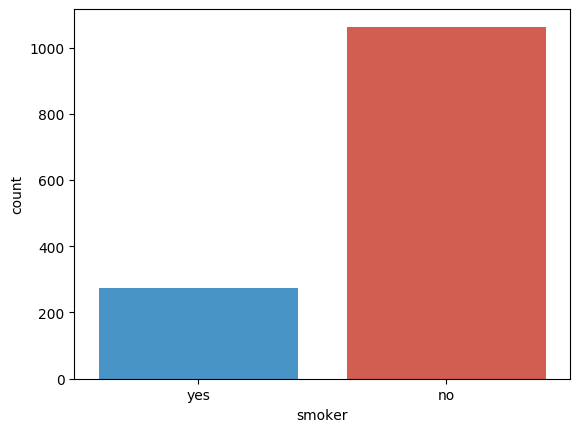

In [30]:
sns.countplot(x="smoker", hue="smoker", data=df, palette=["#3498db", "#e74c3c"], legend=False)
plt.show()

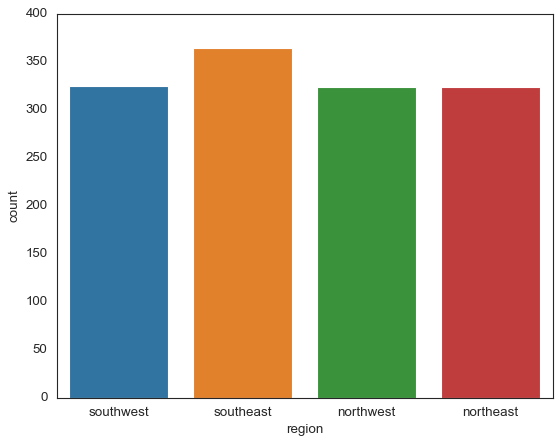

In [52]:
sns.countplot(x="region", hue="region", data=df, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
plt.show()

**encoding categorical variables into numeric values**

In [55]:
laqbel_encoder = preprocessing.LabelEncoder()

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df["sex"]=laqbel_encoder.fit_transform(df["sex"])
df["smoker"]=laqbel_encoder.fit_transform(df["smoker"])
df["region"]=laqbel_encoder.fit_transform(df["region"])

**Encoding Categorical Columns & Checking Correlation**

The categorical features are  converted into numeric values.

This preprocessing step is important because correlation calculations and many machine-learning models require numeric inputs.

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**analyzing correlations with the target variable**

In [63]:
df.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

Correlation interpretation:

* +1 → strong positive relationship (as one increases, the other increases)

* –1 → strong negative relationship (as one increases, the other decreases)

* 0 → no linear relationship

**heatmap using seborn**

<Axes: >

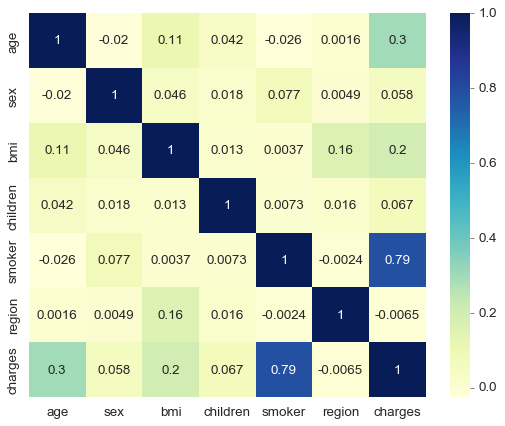

In [64]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

**Analyze how all columns are correlated with each other, and then use a for-loop to plot the distribution of each column.**

- Plotting Distributions for All Columns

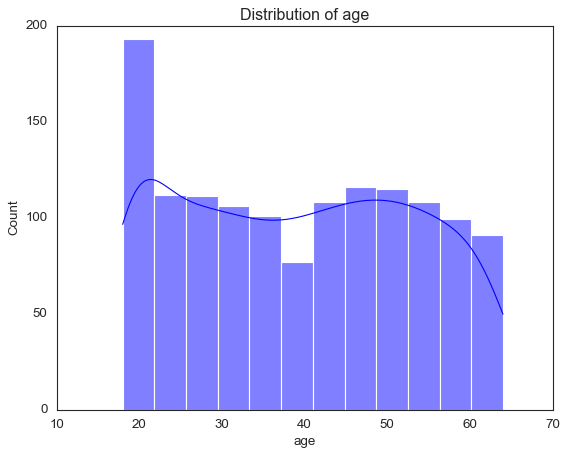

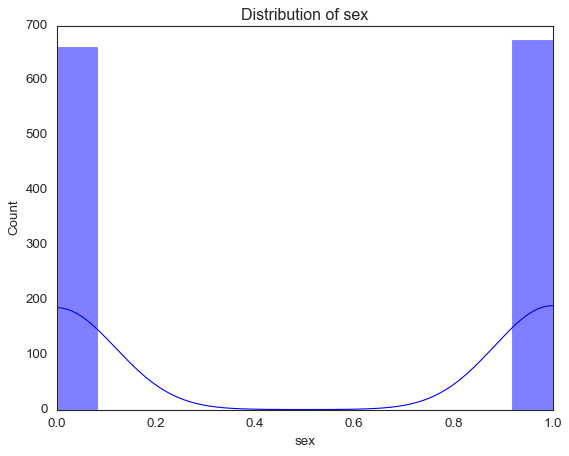

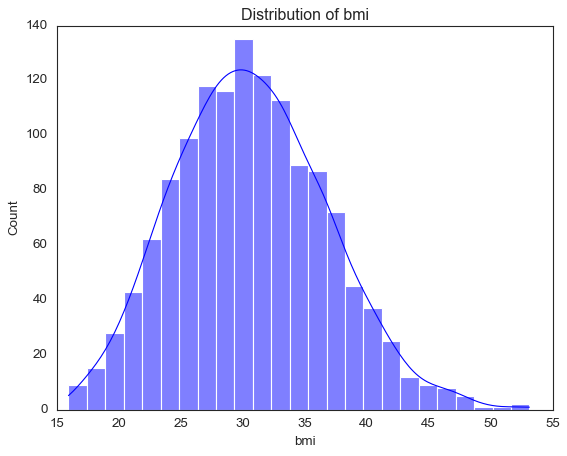

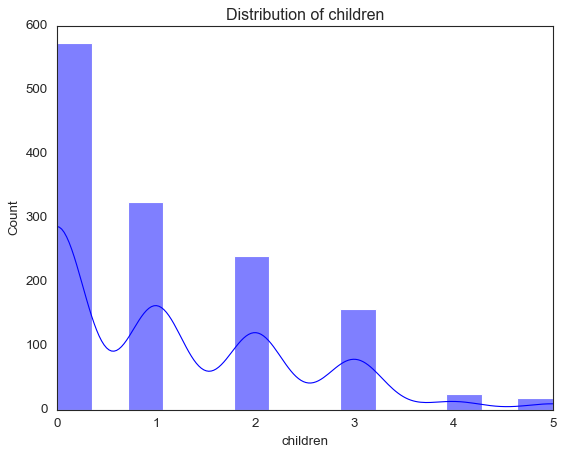

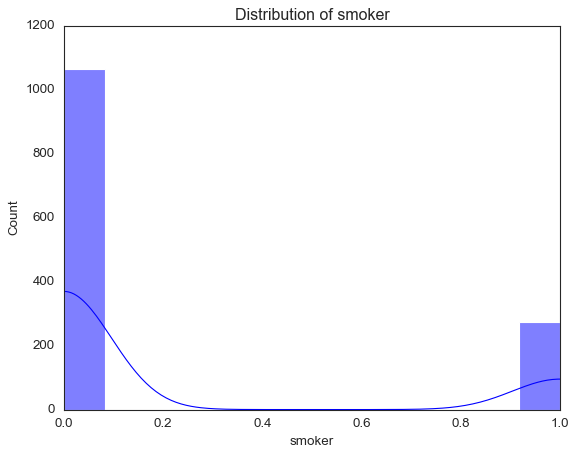

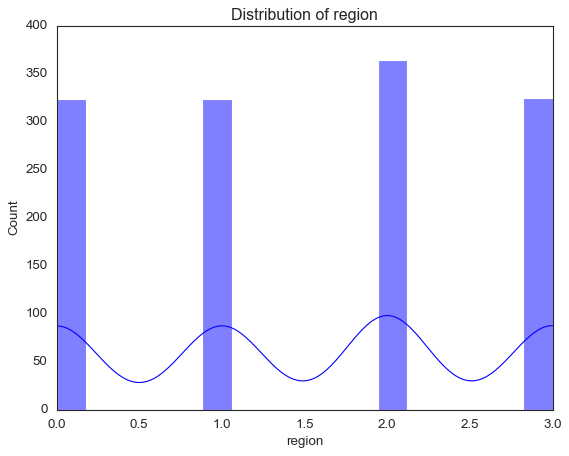

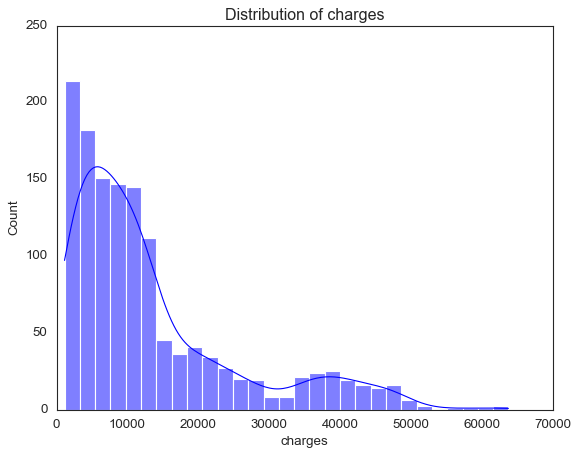

In [66]:
for i in df.columns:
    plt.figure()
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

**Summary:**

Approximately normal: bmi

Skewed: charges, age, children